# Cursive Hiragana Classiffication Competition



In [1]:
import numpy as np 
import pandas as pd
import os
print(os.listdir("./"))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#from bubbly.bubbly import bubbleplot 
#from __future__ import division
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

['.ipynb_checkpoints', 'competition_data.csv', 'country.png', 'cursive-hiragana-classification-publicleaderboard.csv', 'cursive-hiragana-images-classification.ipynb', 'discipline.png', 'du.png', 'endava-images-classification_kederacc.ipynb', 'kuzushiji-competition-public-leaderboard.html', 'kuzushiji-competition-public-leaderboard.ipynb', 'PrivateLeaderboard.xlsx', 'publicleaderboarddata (7).zip', 'read-compressed-numpy-files-in-r.R', 'titled.png']


# Read the data

In [2]:
public_df = pd.read_csv("./cursive-hiragana-classification-publicleaderboard.csv")
comp_df = pd.read_csv("./competition_data.csv")

## Check the data

In [3]:
public_df.head()

,TeamId,TeamName,SubmissionDate,Score
0,2925865,radu,2019-03-20 08:38:26,0.92416
1,2925865,radu,2019-03-20 08:48:31,0.94516
2,2925865,radu,2019-03-20 14:04:56,0.96016
3,2925969,Vitalie Cracan,2019-03-20 14:55:32,0.91066
4,2926062,Marius MC,2019-03-20 15:19:04,0.94783


In [4]:
comp_df.head()

,Rank,ID,Name,Gen,DU,Country,Title,Discipline,Score,Submissions,Public_Solution
0,1,kederrac,Gheorghe Rusu,M,Cluj-Napoca,Romania,Senior Developer,Development,0.99521,9,1
1,2,bogdanluncasu,Bogdan Luncasu,M,Iasi,Romania,Senior Developer,Development,0.99464,67,1
2,3,ezekjh,Ezequiel Konjuh,M,Rosario,Argentina,Senior Developer,Development,0.99350,40,1
3,4,marinel,Marinel Marian,M,Targu Mures,Romania,Senior Developer,Development,0.99321,19,1
4,5,radupostelnicu,Radu Postelnicu,M,Iasi,Romania,Senior Developer,Development,0.99257,33,1


# Competition progress

Here is presented the competition progress.

In [5]:
teams = list(public_df.TeamName.value_counts().index)
data = []
for team in teams:
    dT = public_df[public_df['TeamName'] == team]
    trace = go.Scatter(
        x = dT['SubmissionDate'],y = dT['Score'],
        name=team,
        mode = "markers+lines"
    )
    data.append(trace)

layout = dict(title = 'Public Leaderboard Submissions',
          xaxis = dict(title = 'Submission Date', showticklabels=True), 
          yaxis = dict(title = 'Team Score'),
          #hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='public-leaderboard')

# Competition final results

Let's see also the competition final results.

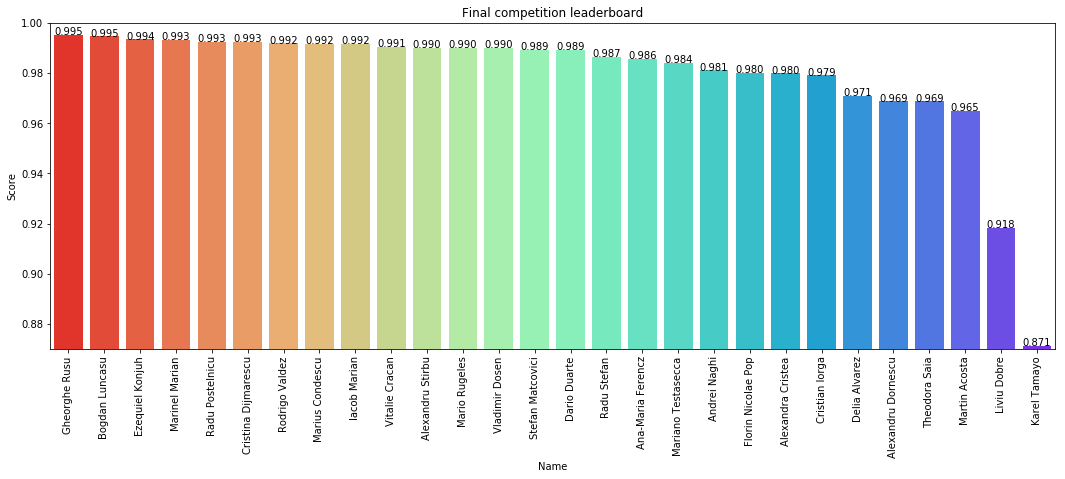

In [6]:
f, ax = plt.subplots(1,1, figsize=(18,6))
s = sns.barplot(comp_df['Name'], comp_df['Score'], palette='rainbow_r')
s.set(ylim=(0.87, 1.0))
plt.title("Final competition leaderboard")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.3f}'.format(height),
            ha="center") 
plt.show()

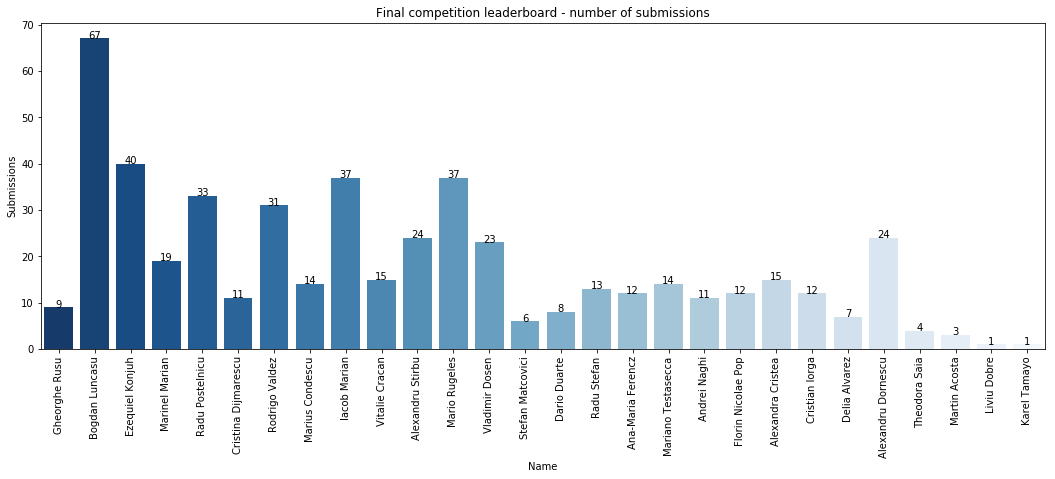

In [7]:
f, ax = plt.subplots(1,1, figsize=(18,6))
s = sns.barplot(comp_df['Name'], comp_df['Submissions'], palette='Blues_r')
plt.title("Final competition leaderboard - number of submissions")
plt.xticks(rotation=90)
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{}'.format(height),
            ha="center") 
plt.show()

# Competition statistics

Let's see more statistics about the competition.

In [23]:
def plot_average(feature, width, title):
    tmp = comp_df.groupby([feature])['Score'].mean()
    df = pd.DataFrame(data={'Score': tmp.values}, index=tmp.index).reset_index().sort_values('Score', ascending=False)
    f, ax = plt.subplots(1,1, figsize=(3*width,6))
    s = sns.barplot(df[feature], df['Score'],palette='rainbow_r')
    s.set(ylim=(0.87, 1.0))
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.3f}'.format(height),
                ha="center") 
    plt.xticks(rotation=90)
    plt.show()
def plot_count(feature, width, title):
    tmp = comp_df.groupby([feature])['Score'].count()
    df = pd.DataFrame(data={'Score': tmp.values}, index=tmp.index).reset_index().sort_values('Score', ascending=False)
    f, ax = plt.subplots(1,1, figsize=(3*width,6))
    s = sns.barplot(df[feature], df['Score'],palette='rainbow_r')
    plt.title(title)
    for p in ax.patches:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{}'.format(height),
                ha="center") 
    plt.xticks(rotation=90)
    plt.show()
def plot_max(feature, width, title):
    tmp = comp_df.groupby([feature])['Score'].max()
    df = pd.DataFrame(data={'Score': tmp.values}, index=tmp.index).reset_index().sort_values('Score', ascending=False)
    f, ax = plt.subplots(1,1, figsize=(3*width,6))
    s = sns.barplot(df[feature], df['Score'],palette='rainbow_r')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.3f}'.format(height),
                ha="center") 
    plt.xticks(rotation=90)
    plt.show()    

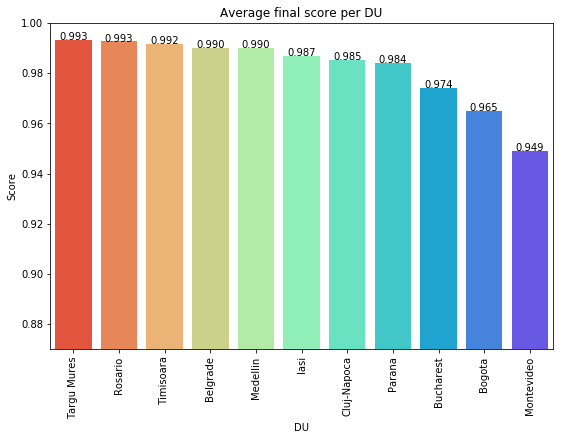

In [24]:
plot_average('DU', 3, 'Average final score per DU')

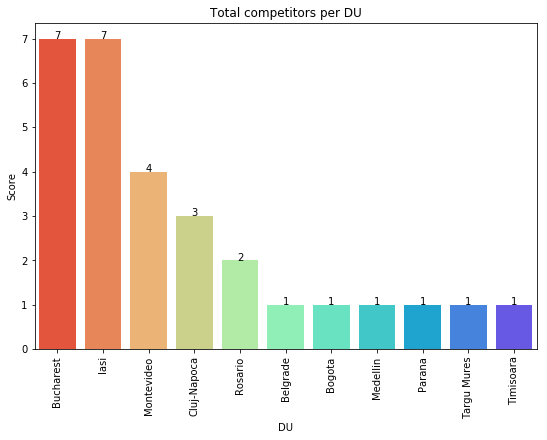

In [25]:
plot_count('DU', 3, 'Total competitors per DU')

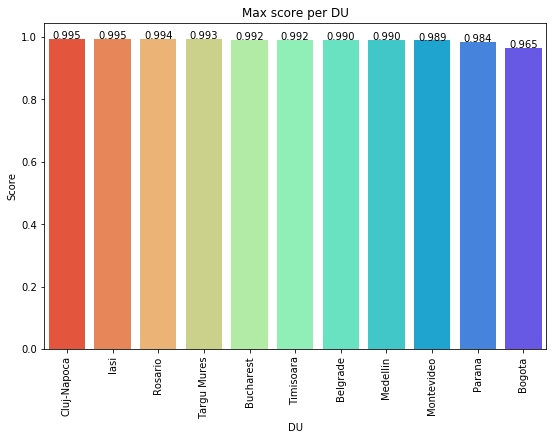

In [26]:
plot_max('DU', 3, 'Max score per DU')

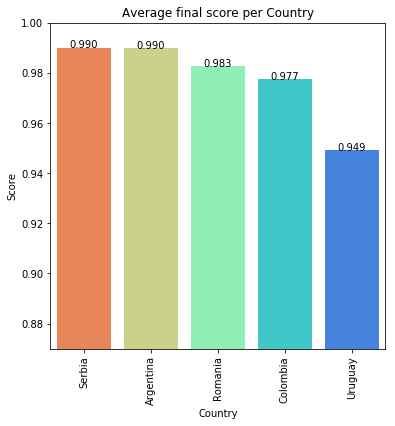

In [27]:
plot_average('Country', 2, 'Average final score per Country')

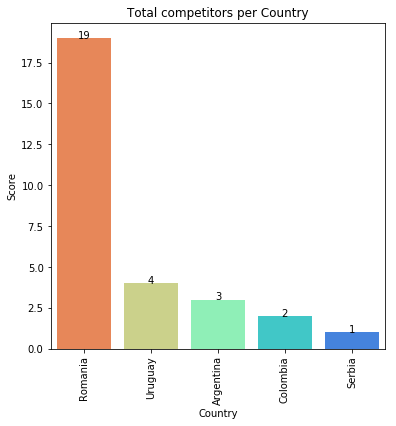

In [28]:
plot_count('Country', 2, 'Total competitors per Country')

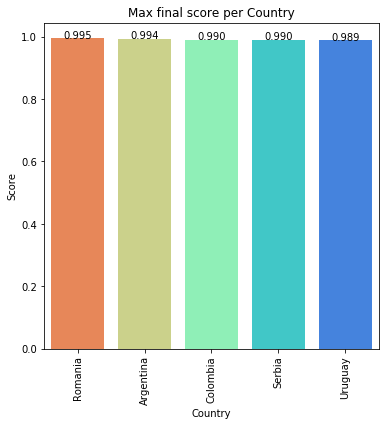

In [29]:
plot_max('Country', 2, 'Max final score per Country')

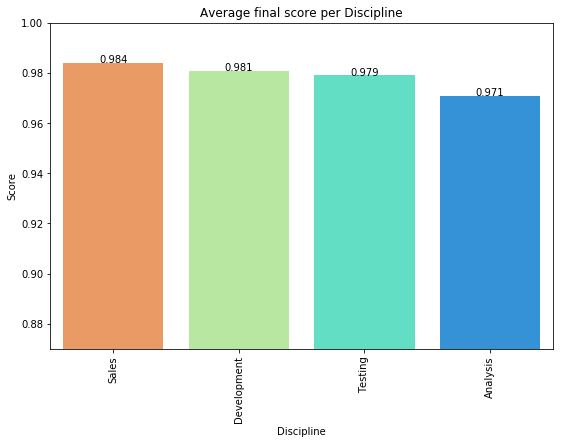

In [30]:
plot_average('Discipline', 3, 'Average final score per Discipline')

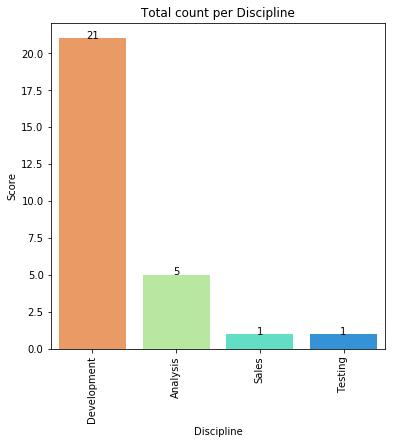

In [31]:
plot_count('Discipline', 2, 'Total count per Discipline')

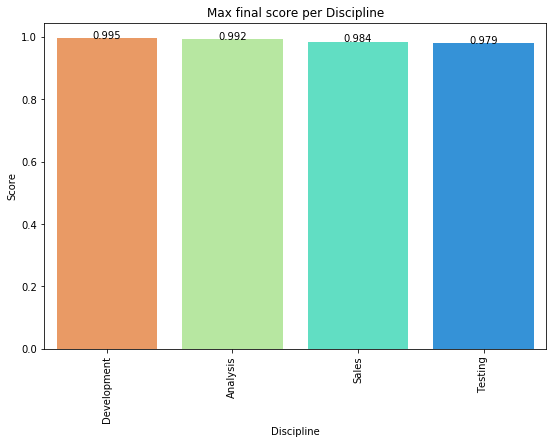

In [32]:
plot_max('Discipline', 3, 'Max final score per Discipline')

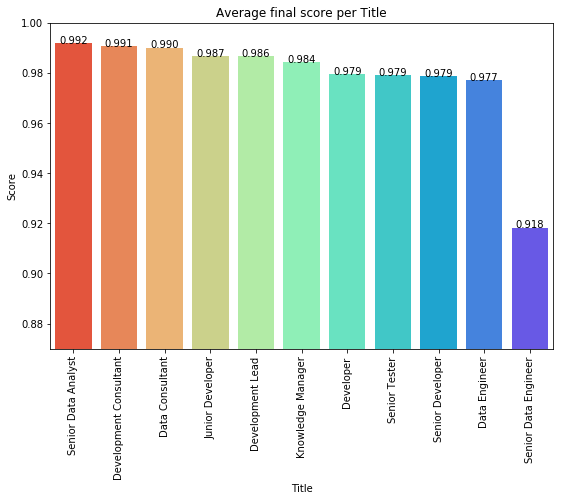

In [33]:
plot_average('Title', 3, 'Average final score per Title')

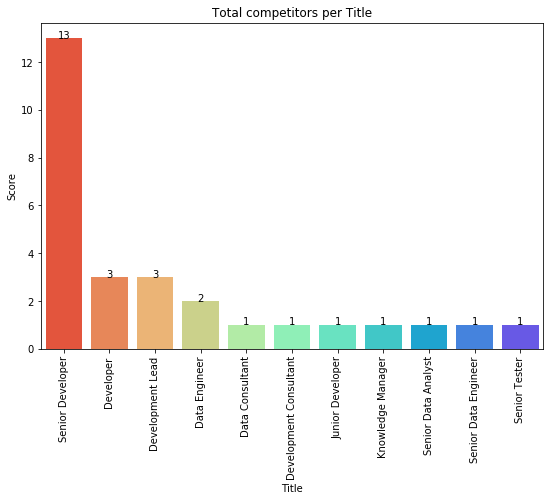

In [35]:
plot_count('Title', 3, 'Total competitors per Title')

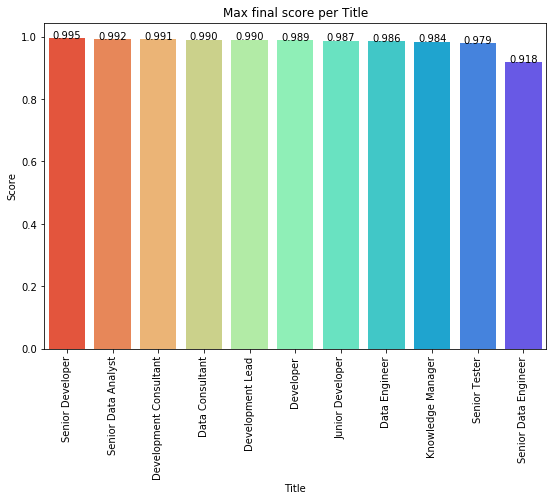

In [36]:
plot_max('Title', 3, 'Max final score per Title')

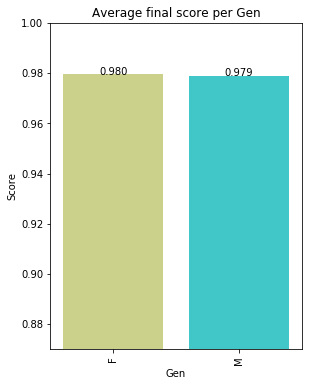

In [37]:
plot_average('Gen', 1.5, 'Average final score per Gen')

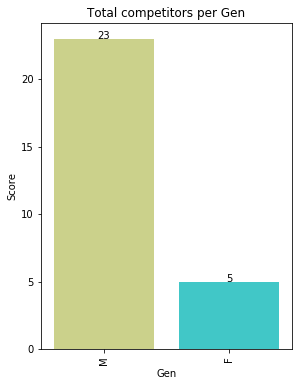

In [38]:
plot_count('Gen', 1.5, 'Total competitors per Gen')

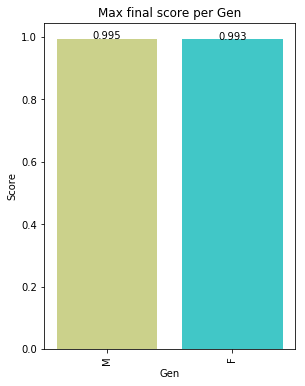

In [39]:
plot_max('Gen', 1.5, 'Max final score per Gen')